In [11]:
import gym
import highway_env
import torch
import matplotlib.pyplot as plt
import numpy as np
from collections import deque, namedtuple
from dqn_agent import Agent

env = gym.make("racetrack-v0")
# print('State shape: ', env.observation_space)
# print('Number of actions: ', env.action_space)

(1, 128, 128)


IndexError: index 1 is out of bounds for axis 0 with size 1

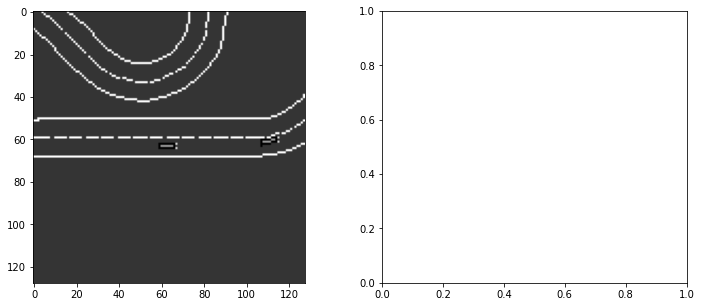

In [25]:
config = {
       "observation": {
           "type": "GrayscaleObservation",
           "observation_shape": (128, 128),
           "stack_size": 1,
           "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
           "scaling": 1.75,
       },
       "policy_frequency": 2
   }
env.configure(config)
obs = env.reset()
print(obs.shape)

_, axes = plt.subplots(ncols=2, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

(4, 128, 64)


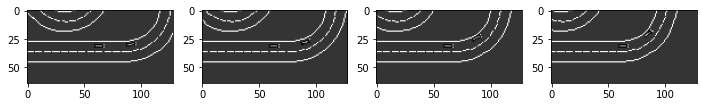

In [19]:
for _ in range(1):
    action = [0, 0]
    obs, _, _, _ = env.step(action)
    print(obs.shape)
    _, axes = plt.subplots(ncols=4, figsize=(12, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

In [12]:
buffer_size = [1e4, 1e5, 1e6]
agent_scores = []
for b in buffer_size:
    agent = Agent(state_size=128 * 128, action_size=2, buffer_size=b)
    n_episodes = 2000
    max_t = 2000
    eps_start = 1.0
    eps_end = 0.001
    eps_decay = 0.995

    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)

        n_episode_win = (i_episode + 1) % 100
        if (n_episode_win == 0):
            scores.append(np.mean(scores_window))

        eps = max(eps_end, eps_decay*eps)
        print('\rEpisode {}\tAverage Score: {:.1f}\tBuffer size = {}'.format(i_episode, np.mean(scores_window), b), end="")
        if np.mean(scores_window) >= 200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'optimal_network.pth')
            break

    agent_scores.append(scores)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (24x12 and 16384x64)